# MediaPipe for Dummies

Associated with the [MediaPipe for Dummies](https://www.assemblyai.com/blog/mediapipe-for-dummies/) article by [AssemblyAI](https://www.assemblyai.com/)

<h1 style = 'background:red;text-align:center'> BETTER TO MAKE VIRTUAL ENVIRONMENT <h1>

In [1]:
!git clone https://github.com/AssemblyAI-Examples/mediapipe-python.git
!pip install mediapipe
!pip install PyQt5
!pip install ipython==7.32.0

Cloning into 'mediapipe-python'...


  Using cached mediapipe-0.10.21-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-4.25.6-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata (8.3 kB)
  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadat

In [17]:
import cv2
import mediapipe as mp
import urllib.request
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import PyQt5
from PIL import Image
from IPython.display import HTML
import importlib
from base64 import b64encode

nb_helpers = importlib.import_module("mediapipe-python.nb_helpers")

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

# FACE

## Fetch Image

In [19]:
import os

if not os.path.exists('images'):
    os.makedirs('images')

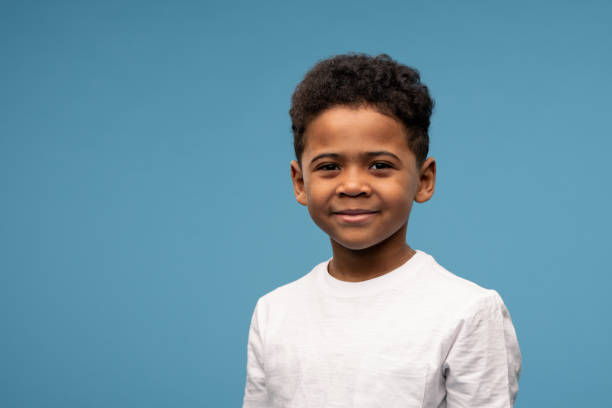

In [20]:
face_url = "https://media.istockphoto.com/id/1252919000/photo/happy-little-boy-of-african-ethnicity-in-t-shirt-standing-in-front-of-camera.jpg?s=612x612&w=0&k=20&c=qskL4BcGFb0nZr4cLpSOuyZlKH_h_ui4sVm3wHOyEmc="
urllib.request.urlretrieve(face_url, "images/face_image.jpg")

img = Image.open('images/face_image.jpg')
display(img)

In [21]:
file = 'images/face_image.jpg'
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1, color=[4, 244, 4])

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    # Read image file with cv2 and convert from BGR to RGB
    image = cv2.imread(file)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

face_found = bool(results.multi_face_landmarks)

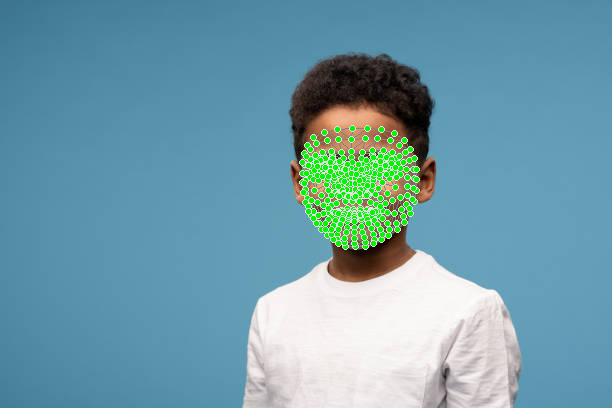

In [22]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()

    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())

    cv2.imwrite('images/face_tesselation_only.png', annotated_image)

img = Image.open('images/face_tesselation_only.png')
display(img)

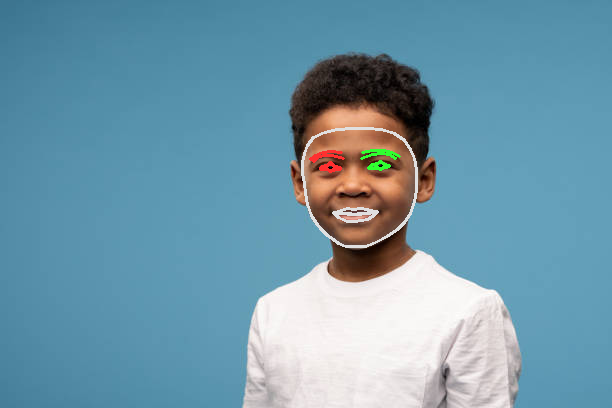

In [23]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:

        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())

        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())

    cv2.imwrite('images/face_contours_and_irises.png', annotated_image)

img = Image.open('images/face_contours_and_irises.png')
display(img)

In [24]:
# Fetch image for analysis
img_url = "https://static.turbosquid.com/Preview/2015/11/10__11_56_36/anthonystanding23dmetry3dhuman01.jpg5e774d4d-9b9e-456d-9d7b-fc4d741cf940Large.jpg"
urllib.request.urlretrieve(img_url, "images/pose.jpg")

('images/pose.jpg', <http.client.HTTPMessage at 0x20f6533f850>)

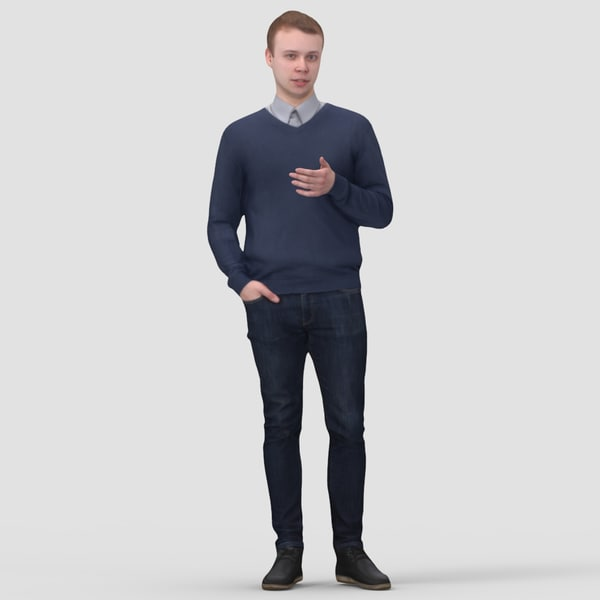

In [25]:
img = Image.open('images/pose.jpg')
display(img)

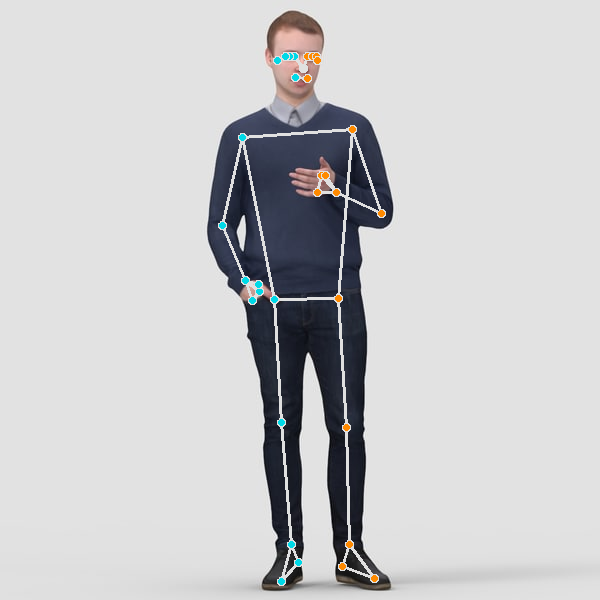

In [26]:
# Specify the image filename
file = 'images/pose.jpg'

# Create a MediaPipe `Pose` object
with mp_pose.Pose(static_image_mode=True,
                  model_complexity=2,
                  enable_segmentation=True) as pose:

    # Read the file in and get dims
    image = cv2.imread(file)

    # Convert the BGR image to RGB and then process with the `Pose` object.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Copy the iamge
annotated_image = image.copy()

# Draw pose, left and right hands, and face landmarks on the image with drawing specification defaults.
mp_drawing.draw_landmarks(annotated_image,
                          results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS,
                          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

# Save image with drawing
filename = "images/pose_wireframe.png"
cv2.imwrite(filename, annotated_image)

# Open image
display(Image.open(filename))

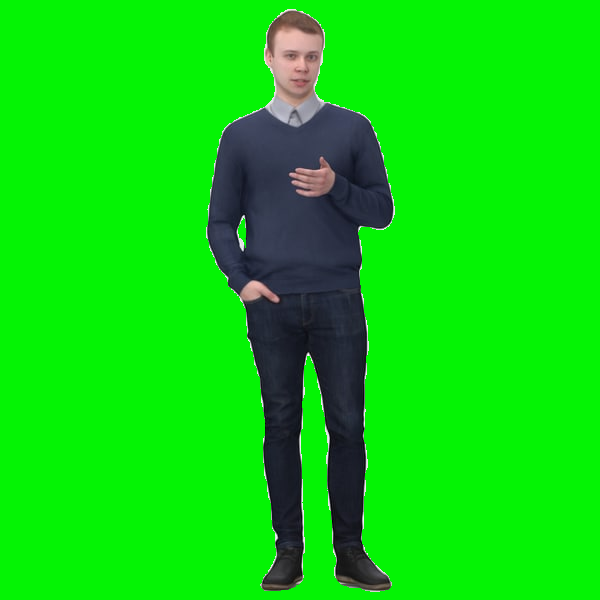

In [27]:
segmented_image = image.copy()

# Value in [0, 1] that says how "tight" to make the segmentation. Greater => tighter
tightness = .3

# Stacks the segmentation mask for 3 RGB channels, and then creates a filter for which pixels to keep
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > tightness

# Creates a black background image
bg_image = np.zeros(image.shape, dtype=np.uint8)

# Can change the color by specifying (0-255) RGB values below
bg_image[:] = [4, 244, 4]

# Where the condition is met (i.e. above inclusion threshold), display annotated image
# Otherwise, use the background color
segmented_image = np.where(condition, segmented_image, bg_image)

filename = 'images/pose_green_screen.png'
cv2.imwrite(filename, segmented_image)
display(Image.open(filename))

In [38]:
poselandmarks_list = nb_helpers.poselandmarks_list

num = 0
for i in mp_holistic.POSE_CONNECTIONS:
    if num < 5:
        print(poselandmarks_list[i[0]], '-->', poselandmarks_list[i[1]])
    else:
        break
    num += 1

LEFT_WRIST --> LEFT_THUMB
RIGHT_WRIST --> RIGHT_INDEX
RIGHT_PINKY --> RIGHT_INDEX
LEFT_EYE_OUTER --> LEFT_EAR
RIGHT_ELBOW --> RIGHT_WRIST


In [39]:
# Pickle data as numpy array
data = np.empty((3, len(mp_holistic.PoseLandmark)))

landmarks = results.pose_world_landmarks.landmark
for i in range(len(mp_holistic.PoseLandmark)):
    data[:, i] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)

In [40]:
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

nb_helpers.plot_data(data, ax)
nb_helpers.scale_axes(ax)

filename = 'pose_rotation.mp4'
nb_helpers.rotate_and_save(fig, ax, filename, save=True)

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: AbstractMovieWriter.__init__() got an unexpected keyword argument 'extra_args'

In [ ]:
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls loop autoplay>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
url = 'https://github.com/AssemblyAI-Examples/mediapipe-python/blob/main/walking.mp4?raw=true'
urllib.request.urlretrieve(url, 'images/walking.mp4')

In [ ]:
file = 'images/walking.mp4'
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    cap = cv2.VideoCapture(file)

    if cap.isOpened() == False:
        print("Error opening video stream or file")
        raise TypeError

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    data = np.zeros((3, len(mp_pose.PoseLandmark), length))


    frame_num = 0
    while cap.isOpened():
        ret, image = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        landmarks = results.pose_world_landmarks.landmark
        for i in range(len(mp_pose.PoseLandmark)):
            data[:, i, frame_num] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)

        frame_num += 1

    cap.release()
    #out.release()

In [ ]:
data.shape

In [ ]:
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

anim = nb_helpers.time_animate(data, fig, ax)

# Save
filename = "images/walking_wireframe.mp4"
anim.save(filename, fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)

In [ ]:
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls loop autoplay>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)